# The Atoms of Computation

In this article, we’ll look at the basics principles behind quantum and standard digital devices. To help us transition over to quantum computing later on, we’ll do it using the same tools as we'll use for quantum.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

### 1. Splitting information into bits

With only 0s and 1s we can represent any piece of information: they are the world's simplest alphabet!

For any letter, number, or punctuation mark you want to use, you can find a corresponding string of at most eight bits using this table. 

This is how all information is represented in computers. Whether numbers, letters, images, or sound, it all exists in the form of binary strings.

### 2. Computation as a diagram

We have inputs on the left, outputs on the right and operations represented by symbols in between. These operations are called *gates*.

### 3. First quantum circuit

In a circuit, we do mostly 3 operations:
1. encode the input
2. do some computations
3. extract the output

In [16]:
# create a circuit with 8 qubits and 8 outputs
qc_output = QuantumCircuit(8)

# the extraction is done using `measure_all()`. 
# Each measurement tells a specific qubit to give an output to a specific
# output bit.
# The function `measure_all()` also add some classical bits to write the output to

qc_output.measure_all()



# Now let's look at the circuit
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

#### Visualizing a Quantum Circuit

When building a quantum circuit, it often helps to draw the circuit. This is supported natively by a `QuantumCircuit` object. The `draw()` method will render an ASCII art version of the circuit diagram.

A text output is useful for quickly seeing the output while developing a circuit, but there are better alternatives providing more flexibility and higher interpretability: `matplotlib` (`mpl`) and `LaTeX` (`latex`) which leverage the qcircuit package.

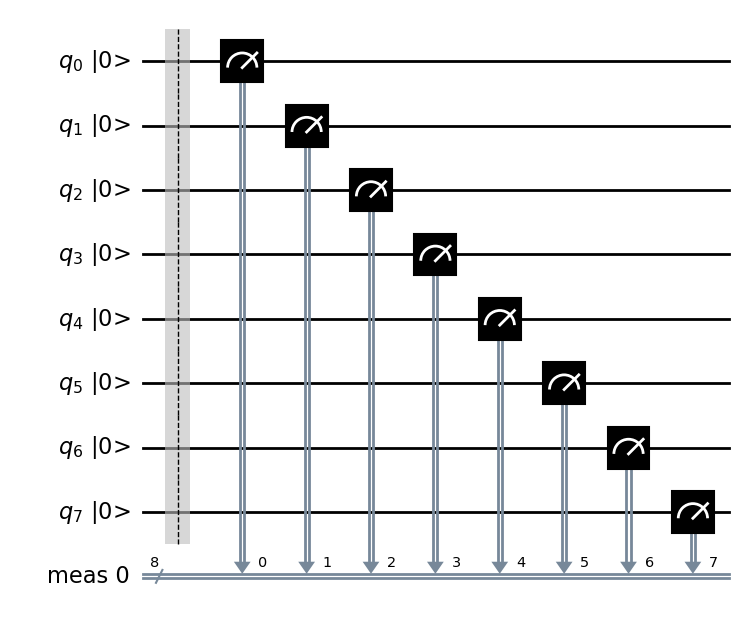

In [18]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10.0, 8.0)

# Matplotlib drawing
qc_output.draw(output='mpl', initial_state=True) # Qubits are always initialized to give the output 0

If we don't do anything to out quibits in the circuit, '0' is the result we get once we measure them. We will find that the result is **always** 00000000

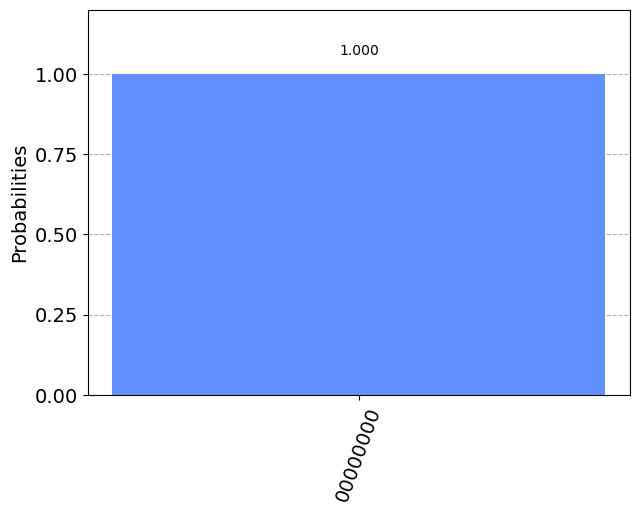

In [19]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_output, shots=1024).result()
hist = result.get_counts()
plot_histogram(hist)

> **nb:** this result comes from a quantum **simulator**, which is a standard computer calculating what a *quantum computer* would do.\
 Simulations are only possible for small numbers of qubits (~30 qubits), but thye are nevertheless an useful tool when designing "toy quantum circuits". 